In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [2]:
DATA_DIR = os.path.join(
    os.path.dirname(os.path.dirname(os.getcwd())), "data/"
)
structure_names = ["Ge-1_Se-1", "Ge-1_Te-1"]
df = pd.concat([pd.read_csv(os.path.join(DATA_DIR, struct_name + ".csv"), index_col=0) for struct_name in structure_names])

In [3]:
cols_raw = list(df.columns)
cols_trash = ['converged', 'accuracy']
cols_independent = ['delta_E']
cols_drop = cols_trash + cols_independent

cols_dependent = cols_raw.copy()
for element in cols_drop:
    cols_dependent.remove(element)

In [4]:
X_raw = df[cols_dependent]
y_raw = df[cols_independent]

In [5]:
X_raw.describe()

,ecutrho,k_density,ecutwfc,PTC1,PTC2,PTC3,PTC4,PTC5,PTC6,PTC7,...,PTC9,PTC10,PTC11,PTC12,PTC13,PTC14,PTC15,PTC16,PTC17,PTC18
count,1235.000000,1235.000000,1235.000000,1235.0,1235.0,1235.0,1235.0,1235.0,1235.0,1235.0,...,1235.0,1235.0,1235.0,1235.0,1235.0,1235.0,1235.0,1235.0,1235.0,1235.0
mean,242.348178,0.228981,56.558704,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.5,0.0,0.0
std,90.009860,0.145444,22.897391,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,100.000000,0.100000,20.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.5,0.0,0.0
25%,180.000000,0.125000,35.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.5,0.0,0.0
50%,260.000000,0.166667,55.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.5,0.0,0.0
75%,340.000000,0.250000,75.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.5,0.0,0.0
max,380.000000,0.500000,100.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.5,0.0,0.0


Text(0.5, 0, 'ecutwfc')

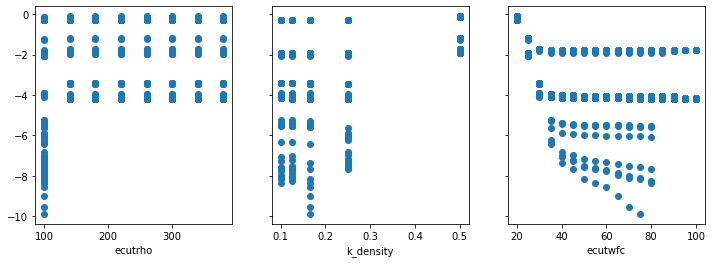

In [17]:
fig, ax = plt.subplots(1,3,figsize=(12,4), sharey=True, squeeze=True)
for i, col in enumerate(X_raw.columns[:3]):
    ax[i].scatter(X_raw[col], np.log(y_raw - np.min(y_raw)))
ax[0].set_xlabel("ecutrho")
ax[1].set_xlabel('k_density')
ax[2].set_xlabel('ecutwfc')


<IPython.core.display.Javascript object>


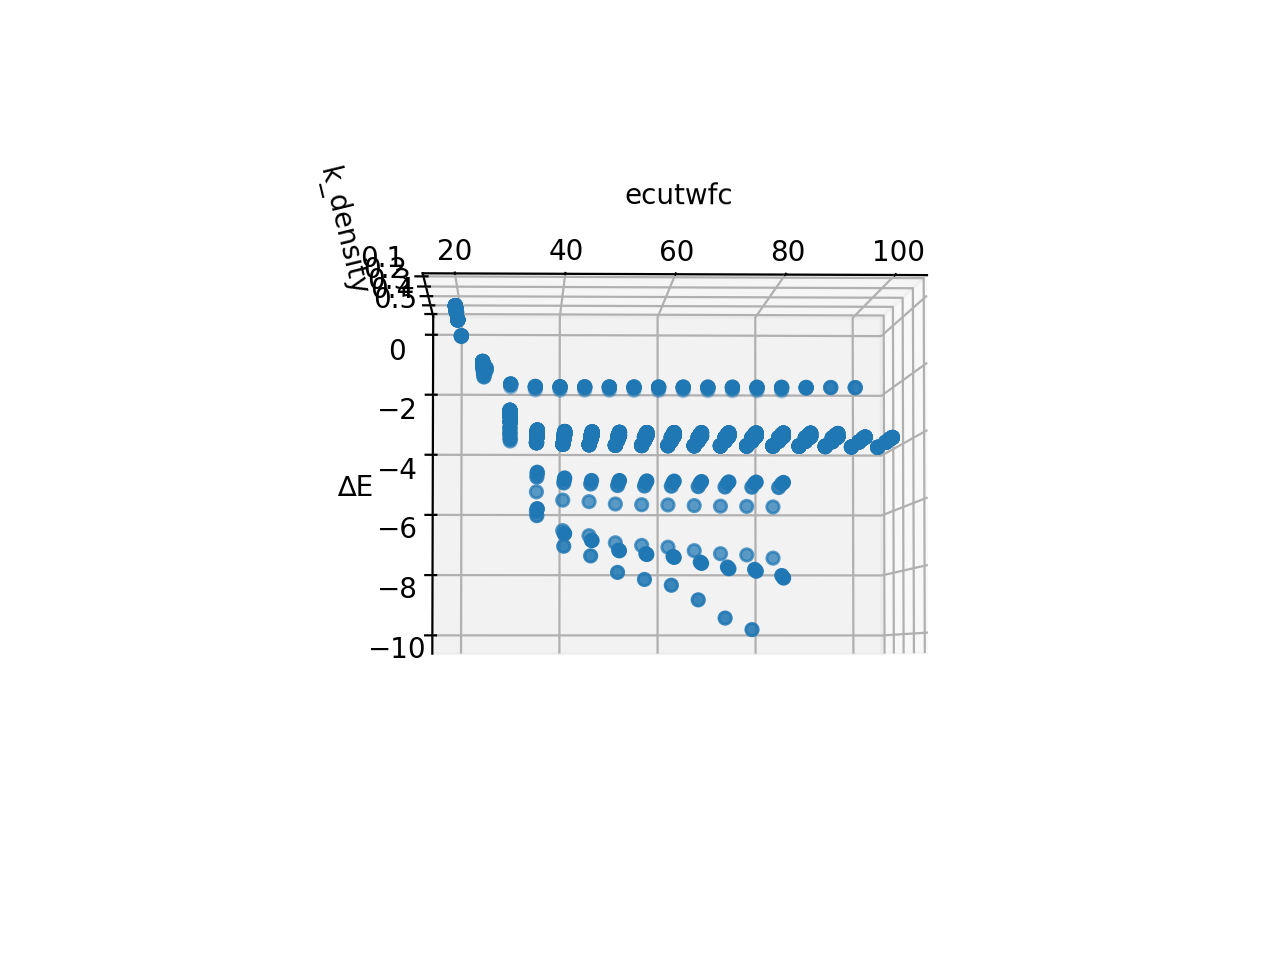

Text(0.5, 0, '∆E')

In [26]:
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_raw['ecutwfc'], X_raw['k_density'], np.log(y_raw - np.min(y_raw)))
ax.set_xlabel('ecutwfc')
ax.set_ylabel('k_density')
ax.set_zlabel('∆E')